# Import Packages

In [1]:
using Gurobi
using PiecewiseLinear

# Basic example: Use 5 linear functions to approximate:
$$ f:[0,6] \rightarrow \mathbb{R} $$
$$f(x) = x^2 - 3x +2 $$

## 1) Norm $L^1$

Academic license - for non-commercial use only - expires 2023-08-07


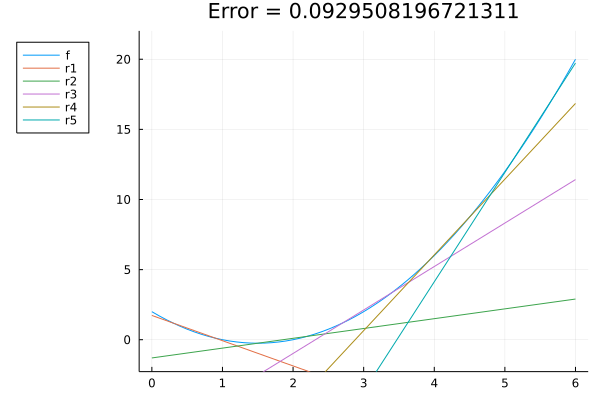

In [2]:
prb = create((x->x^2-3x+2), collect(0.0:0.1:6.0), 5, Gurobi.Optimizer);
fit!(prb);
plot(prb)

## 2) Norm $L^2$

Academic license - for non-commercial use only - expires 2023-08-07


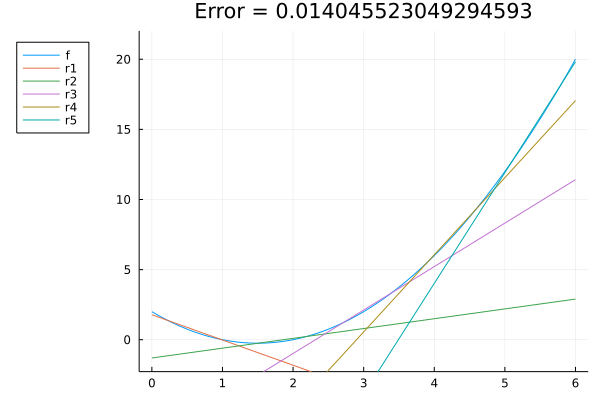

In [3]:
prb = create((x->x^2-3x+2), collect(0.0:0.1:6.0), 5, Gurobi.Optimizer, norm=PiecewiseLinear.L2);
fit!(prb);
plot(prb)

## 3) Norm $L^\infty$

Academic license - for non-commercial use only - expires 2023-08-07


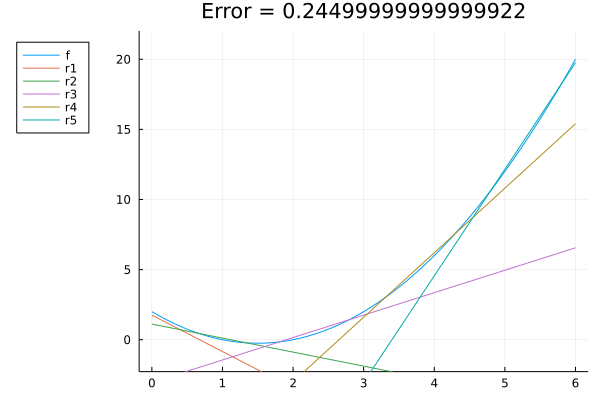

In [4]:
prb = create((x->x^2-3x+2), collect(0.0:0.1:6.0), 5, Gurobi.Optimizer, norm=PiecewiseLinear.Linf);
fit!(prb);
plot(prb)

# Advanced example: Linear programming application


## Minimize modulus function
$$\min_{-5 \leq x \leq 5} |x| $$

In [ ]:
prb = create(abs(x), collect(-5.0:0.1:5.0), 2, Gurobi.Optimizer);
fit!(prb);
plot(prb)

## Minimize quadratic function
$$\min_{0 \leq x \leq 6} x^2-3x+2 $$

In [ ]:
prb = create((x->x^2-3x+2), collect(0.0:0.1:6.0), 5, Gurobi.Optimizer);
fit!(prb);
plot(prb)

## Minimize non-convex function
$$\min_{0 \leq x \leq 5.5} -sin(x) $$

In [ ]:
prb = create((x->-sin(x)), collect(0.0:0.1:5.5), 5, Gurobi.Optimizer, norm=PiecewiseLinear.L2, force_prop=PiecewiseLinear.convex)
fit!(prb);
plot(prb)

## Even if the original function isn't concave (or convex), this property can be imposed in the linearization

Academic license - for non-commercial use only - expires 2023-08-07


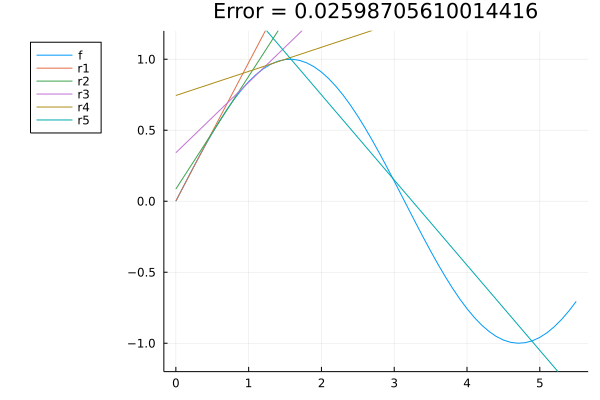

In [5]:
prb = create((x->sin(x)), collect(0.0:0.1:5.5), 5, Gurobi.Optimizer, norm=PiecewiseLinear.L2, force_prop=PiecewiseLinear.concave)
fit!(prb);
plot(prb)